Imports

In [90]:
# imports
import math

import plotly.express as px
import pandas as pd

In [91]:
# iport csv and print head
df = pd.read_csv("weather-stations.csv", delimiter=',', skiprows=0, low_memory=False)
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


Plot the stations using latitude and longitude


In [92]:
# use plotly to plot the stations on a world map
fig = px.scatter_geo(df,lat='Lat',lon='Long', hover_name="Stn_Name", height=640)
fig.update_layout(title = 'Canada\'s Weather Stations', title_x=0.5)
fig.show()

## FEATURE ENGINEERING

In [93]:
# check nr. of rows and features
print(df.shape)

(1341, 25)


In [94]:
# check for NAN values and print them
print(df.isnull().sum())

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64


In [95]:
df_dropped = df.copy()
for i in df.columns:
  if df[i].isnull().sum() > 671:
    print(i)
    df_dropped = df_dropped.drop([i], axis=1)

df_dropped.columns

D
S
DwS
S%N
P%N
BS
DwBS
BS%


Index(['Stn_Name', 'Lat', 'Long', 'Prov', 'Tm', 'DwTm', 'Tx', 'DwTx', 'Tn',
       'DwTn', 'P', 'DwP', 'S_G', 'Pd', 'HDD', 'CDD', 'Stn_No'],
      dtype='object')

In [96]:
# NOT NAN values
var = df[~df.isnull().any(axis=1)]
print(var)

Empty DataFrame
Columns: [Stn_Name, Lat, Long, Prov, Tm, DwTm, D, Tx, DwTx, Tn, DwTn, S, DwS, S%N, P, DwP, P%N, S_G, Pd, BS, DwBS, BS%, HDD, CDD, Stn_No]
Index: []

[0 rows x 25 columns]


## Use of PMM for Data Imputation


In [97]:
print(df_dropped.dtypes)

df_dropped.head

Stn_Name     object
Lat         float64
Long        float64
Prov         object
Tm          float64
DwTm        float64
Tx          float64
DwTx        float64
Tn          float64
DwTn        float64
P           float64
DwP         float64
S_G         float64
Pd          float64
HDD         float64
CDD         float64
Stn_No       object
dtype: object


<bound method NDFrame.head of                     Stn_Name     Lat     Long Prov    Tm  DwTm    Tx  DwTx  \
0                  CHEMAINUS  48.935 -123.742   BC   8.2   0.0  13.5   0.0   
1     COWICHAN LAKE FORESTRY  48.824 -124.133   BC   7.0   0.0  15.0   0.0   
2              LAKE COWICHAN  48.829 -124.052   BC   6.8  13.0  16.0   9.0   
3           DISCOVERY ISLAND  48.425 -123.226   BC   NaN   NaN  12.5   0.0   
4        DUNCAN KELVIN CREEK  48.735 -123.728   BC   7.7   2.0  14.5   2.0   
...                      ...     ...      ...  ...   ...   ...   ...   ...   
1336                  NAIN A  56.550  -61.683   NL -22.6   0.0  -6.8   0.0   
1337                  NAIN A  56.551  -61.682   NL -19.2  24.0  -7.5  17.0   
1338                  SAGLEK  58.333  -62.586   NL -24.4   2.0 -13.5   1.0   
1339            TUKIALIK BAY  54.716  -58.358   NL -22.8   2.0  -5.8   1.0   
1340                WABUSH A  52.923  -66.865   NL -27.7   0.0 -13.6   0.0   

        Tn  DwTn      P   DwP   S

In [193]:
import numpy as np
from sklearn.impute import KNNImputer

df_dropped_knn = df_dropped.loc[:, ~df_dropped.columns.isin(['Stn_Name', 'Prov', 'Stn_No'])].copy()

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_dropped_knn), columns=df_dropped_knn.columns)

df_knn_imputed = df_knn_imputed.assign(Stn_Name=df['Stn_Name'], Prov=df['Prov'], Stn_No=df['Stn_No'])

df_knn_imputed.shape

df_knn_imputed.head

<bound method NDFrame.head of          Lat     Long     Tm  DwTm    Tx  DwTx     Tn  DwTn       P   DwP  \
0     48.935 -123.742   8.20   0.0  13.5   0.0   1.00   0.0  178.80   0.0   
1     48.824 -124.133   7.00   0.0  15.0   0.0  -3.00   0.0  258.60   0.0   
2     48.829 -124.052   6.80  13.0  16.0   9.0  -2.50   9.0  264.60   9.0   
3     48.425 -123.226   8.32   0.0  12.5   0.0   2.26   0.0   78.02   8.0   
4     48.735 -123.728   7.70   2.0  14.5   2.0  -1.00   2.0  168.40   2.0   
...      ...      ...    ...   ...   ...   ...    ...   ...     ...   ...   
1336  56.550  -61.683 -22.60   0.0  -6.8   0.0 -33.50   0.0   46.60   0.0   
1337  56.551  -61.682 -19.20  24.0  -7.5  17.0 -26.70  21.0   25.20  17.0   
1338  58.333  -62.586 -24.40   2.0 -13.5   1.0 -32.30   1.0   79.92   2.4   
1339  54.716  -58.358 -22.80   2.0  -5.8   1.0 -32.50   1.0   30.48   4.0   
1340  52.923  -66.865 -27.70   0.0 -13.6   0.0 -46.80   0.0    5.10   0.0   

       S_G    Pd      HDD  CDD               

            Tm      DwTm        Tx      DwTx        Tn      DwTn         P  \
Tm    1.000000 -0.060425  0.880090 -0.044219  0.940954 -0.043073  0.541006   
DwTm -0.060425  1.000000 -0.142783  0.961767 -0.029267  0.964661 -0.073512   
Tx    0.880090 -0.142783  1.000000 -0.122027  0.719190 -0.122570  0.372234   
DwTx -0.044219  0.961767 -0.122027  1.000000 -0.012706  0.949554 -0.071864   
Tn    0.940954 -0.029267  0.719190 -0.012706  1.000000 -0.007900  0.592520   
DwTn -0.043073  0.964661 -0.122570  0.949554 -0.007900  1.000000 -0.071012   
P     0.541006 -0.073512  0.372234 -0.071864  0.592520 -0.071012  1.000000   
DwP   0.020949  0.491470 -0.017753  0.550314  0.047827  0.512112 -0.113670   
S_G  -0.376929  0.096873 -0.376486  0.087879 -0.354482  0.083608  0.029604   
Pd    0.447926 -0.102984  0.285641 -0.123423  0.473551 -0.120469  0.717558   
HDD  -0.855854 -0.448410 -0.704543 -0.441849 -0.821111 -0.446474 -0.445762   
CDD        NaN       NaN       NaN       NaN       NaN       NaN

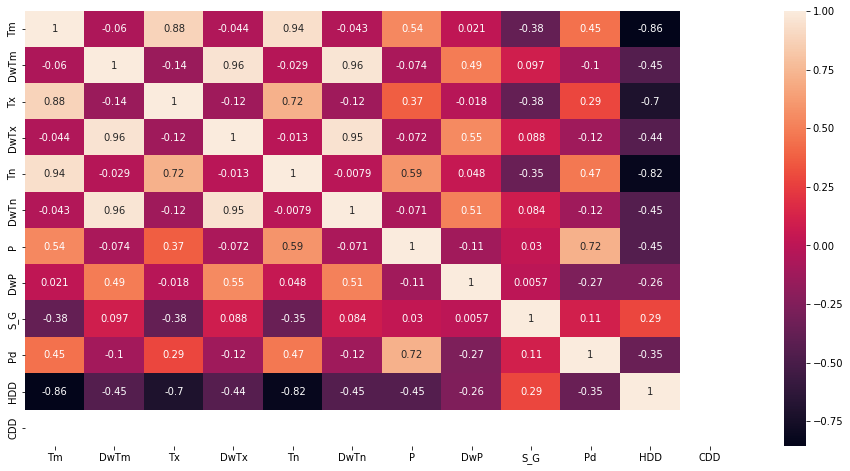

In [194]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

filter_data = ['Stn_Name', 'Prov', 'Stn_No', 'Lat', 'Long']

filtered_df = df_knn_imputed.loc[:, ~df_knn_imputed.columns.isin(filter_data)]

plt.figure(figsize = (16,8))

corr_matrix = filtered_df.corr()

print(corr_matrix)

sn.heatmap(corr_matrix, annot=True)
plt.show()

In [195]:
# DROP CDD due to NAN correlations
filtered_df = filtered_df.drop("CDD", axis=1)

In [196]:
filtered_df.columns

Index(['Tm', 'DwTm', 'Tx', 'DwTx', 'Tn', 'DwTn', 'P', 'DwP', 'S_G', 'Pd',
       'HDD'],
      dtype='object')

In [172]:
def plot_it(data,labels,title, xlab, ylab):    
    # generate a color palette
    colors = sns.color_palette(None, max(labels)+1)
    # plot the samples
    plt.figure(figsize=(8,6))
    plt.title(title)
    # data
    plt.scatter(
            data.iloc[:,0], data.iloc[:,1],
            s=30,
            color='white',
            marker='o', 
            edgecolor='gray',
            alpha=0.5,
            label='data/noise')
    plt.xlabel(f"{xlab}")
    plt.ylabel(f"{ylab}")
    if len(labels) == len(data):        
        # clusters
        for c in range(0,max(labels)+1):
            plt.scatter(
                data.iloc[labels == c, 0], data.iloc[labels == c, 1],
                s=50,
                color=colors[c],
                marker='s', 
                edgecolor='black',
                label='cluster ' + str(c)
            )        
    plt.legend(scatterpoints=1)

In [ ]:
# !pip install hdbscan

In [197]:
filtered_df

,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,S_G,Pd,HDD
0,8.20,0.0,13.5,0.0,1.00,0.0,178.80,0.0,0.0,12.0,273.30
1,7.00,0.0,15.0,0.0,-3.00,0.0,258.60,0.0,0.0,12.0,307.00
2,6.80,13.0,16.0,9.0,-2.50,9.0,264.60,9.0,0.0,11.0,168.10
3,8.32,0.0,12.5,0.0,2.26,0.0,78.02,8.0,0.0,12.0,271.18
4,7.70,2.0,14.5,2.0,-1.00,2.0,168.40,2.0,0.0,11.0,267.70
...,...,...,...,...,...,...,...,...,...,...,...
1336,-22.60,0.0,-6.8,0.0,-33.50,0.0,46.60,0.0,74.0,5.0,1136.50
1337,-19.20,24.0,-7.5,17.0,-26.70,21.0,25.20,17.0,84.8,4.0,148.70
1338,-24.40,2.0,-13.5,1.0,-32.30,1.0,79.92,2.4,63.2,10.0,1101.20
1339,-22.80,2.0,-5.8,1.0,-32.50,1.0,30.48,4.0,71.6,3.8,1060.00


In [202]:
from sklearn.preprocessing import normalize

normalized_df = normalize(filtered_df)

normalized_df = pd.DataFrame(normalized_df, columns=filtered_df.columns)

normalized_df

,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,S_G,Pd,HDD
0,0.025061,0.000000,0.041260,0.000000,0.003056,0.000000,0.546462,0.000000,0.000000,0.036675,0.835281
1,0.017416,0.000000,0.037320,0.000000,-0.007464,0.000000,0.643391,0.000000,0.000000,0.029856,0.763809
2,0.021600,0.041293,0.050823,0.028588,-0.007941,0.028588,0.840478,0.028588,0.000000,0.034940,0.533954
3,0.029404,0.000000,0.044176,0.000000,0.007987,0.000000,0.275732,0.028273,0.000000,0.042409,0.958381
4,0.024297,0.006311,0.045755,0.006311,-0.003156,0.006311,0.531388,0.006311,0.000000,0.034711,0.844730
...,...,...,...,...,...,...,...,...,...,...,...
1336,-0.019814,0.000000,-0.005962,0.000000,-0.029370,0.000000,0.040855,0.000000,0.064878,0.004384,0.996399
1337,-0.106198,0.132748,-0.041484,0.094030,-0.147682,0.116154,0.139385,0.094030,0.469042,0.022125,0.822482
1338,-0.022046,0.001807,-0.012198,0.000904,-0.029184,0.000904,0.072210,0.002168,0.057103,0.009035,0.994961
1339,-0.021436,0.001880,-0.005453,0.000940,-0.030556,0.000940,0.028657,0.003761,0.067317,0.003573,0.996590


## CLUSTERING

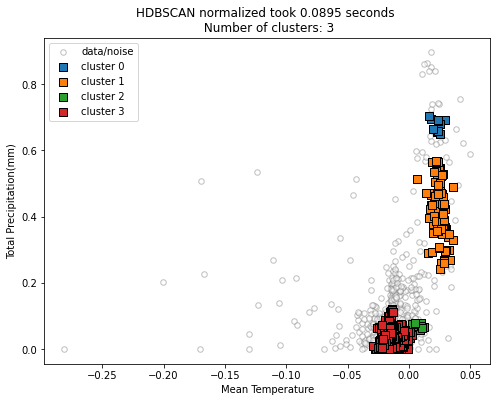

In [214]:
import sklearn.cluster as cluster
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize 



# run clustering
start_time = time.time()
labels = hdbscan.HDBSCAN(min_cluster_size=10).fit_predict(normalized_df)
end_time = time.time()

labels

test_df = normalized_df[["Tm", "P"]]

# plot
plot_it(test_df,labels,f'HDBSCAN normalized took {round(end_time - start_time,4)} seconds \n Number of clusters: {max(labels)}', "Mean Temperature", "Total Precipitation(mm)")

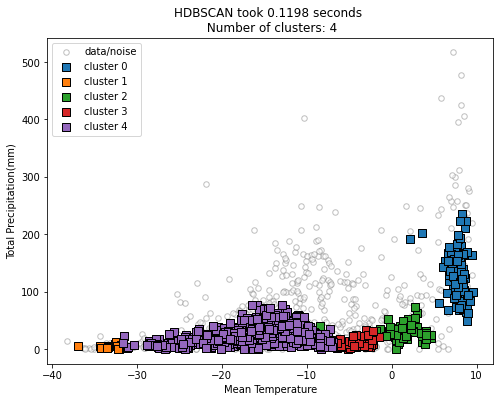

In [205]:
# run clustering
start_time = time.time()
labels = hdbscan.HDBSCAN(min_cluster_size=10).fit_predict(filtered_df)
end_time = time.time()

labels

test_df = filtered_df[["Tm", "P"]]

# plot
plot_it(test_df,labels,f'HDBSCAN took {round(end_time - start_time,4)} seconds \n Number of clusters: {max(labels)}', "Mean Temperature", "Total Precipitation(mm)")

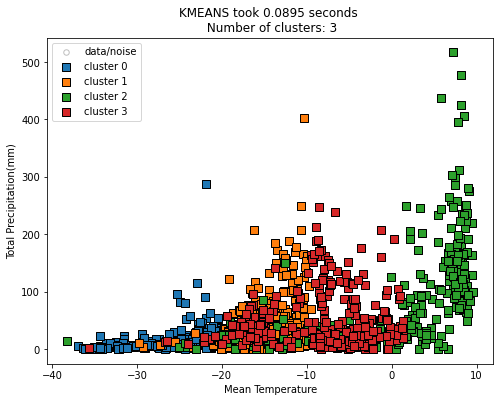

In [223]:
from sklearn.cluster import KMeans  # k-means implementation from scikit
kmeans = KMeans(
    n_clusters=4,  # set the number of clusters
    init='random',  # initial position of cluster centers
    n_init=1,  # number of k-Means runs with different initial centers
    max_iter=10,  # maximum number of iterations within a single run
    tol=1e-04,  # tolerance (metrics) for convergence
    verbose=0,  # output verbosity level (2 ... output inertia)
    random_state=2,  # reproduction parameters
)

kmean_label = kmeans.fit_predict(filtered_df)

test_df = filtered_df[["Tm", "P"]]

# plot
plot_it(test_df,kmean_label,f'KMEANS took {round(end_time - start_time,4)} seconds \n Number of clusters: {max(kmean_label)}', "Mean Temperature", "Total Precipitation(mm)")

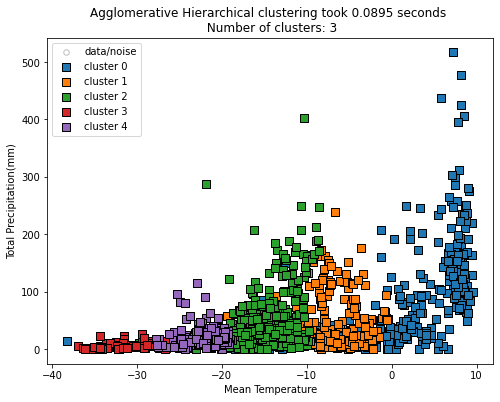

In [224]:
from sklearn.cluster import AgglomerativeClustering 

agg = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
hier_labels= agg.fit_predict(filtered_df)

test_df = filtered_df[["Tm", "P"]]

# plot
plot_it(test_df,hier_labels,f'Agglomerative Hierarchical clustering took {round(end_time - start_time,4)} seconds \n Number of clusters: {max(kmean_label)}', "Mean Temperature", "Total Precipitation(mm)")

## CONCLUSIONS AFTER THE EXPERIMENT



*   After inspecting the data, there were even column with all the observations containing NAN values (BS, DwBS, BS%)
*   The missing values were so many that I had to impute the data using KNN predictive matching
*   IT IS VERY COLD IN CANADA
    * After doing Feature Engineering, there was still a feature (CDD) with NAN values at every other feature, after that I saw that this value is constant, thus, there was never registered a day with above 18 degree Celsius
*   There are many features that are having high correlations, seen in the correlation matrix above, thus, having data quality issues could lead to problems of wrong data
*   Normalizing data wouldn't help for clustering, it would even make it worse (A small comparison shown above between HDSCAN with/without normalization)
*   Surprisingly, Agglomerative Hierarchical Clustering using Ward linkage performed quite the best (without mathematical tests) in comparison with HDBSCAN and KMEANS


*   When the Mean Temperature tends to be positive, the Precipitations rises considerably, and under -20 degree Celsius the Precipitations are quite lacking







